## Data load

In [ ]:
import pickle

with open("/content/data.pickle","rb") as f:
    data=pickle.load(f)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.head(3)

,data,labels
0,"[0.5045999884605408, 0.7418761253356934, 0.357...",A
1,"[0.5709112882614136, 0.747218132019043, 0.4125...",A
2,"[0.5945016145706177, 0.6668608784675598, 0.454...",A


In [ ]:
df["labels"].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X',
       'Y', 'Z'], dtype=object)

In [ ]:
df["labels"].value_counts()

,count
labels,
K,5985
R,5928
B,5916
J,5908
W,5879
A,5844
H,5821
F,5811
G,5794


In [ ]:
len(df.iloc[0]["data"])

42

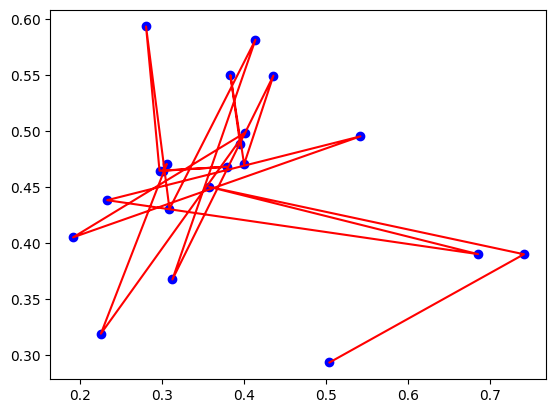

In [ ]:
A=df.iloc[0]["data"]
plt.scatter(A[:21],A[21:],color="blue")
plt.plot(A[:21],A[21:],color="red")
plt.show()

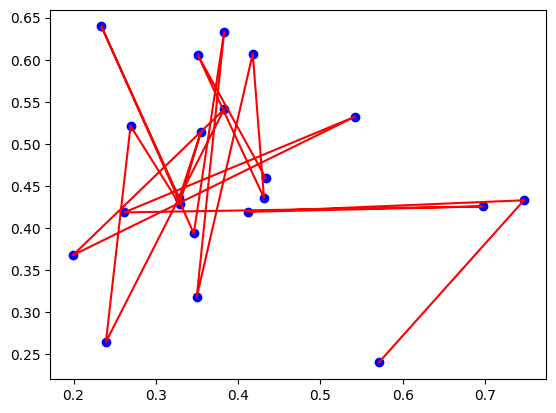

In [ ]:
A=df.iloc[1]["data"]
plt.scatter(A[:21],A[21:],color="blue")
plt.plot(A[:21],A[21:],color="red")
plt.show()

## train test split

In [ ]:
X=df[["data"]]

In [ ]:
X=df["data"].tolist()
X=pd.DataFrame(X)
y=df["labels"]

In [ ]:
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.504600,0.741876,0.357582,0.685967,0.233308,0.542347,0.191636,0.401880,0.225662,0.306018,...,0.468050,0.464505,0.593324,0.430468,0.581450,0.367447,0.549479,0.470374,0.549865,0.488504
1,0.570911,0.747218,0.412517,0.696975,0.261519,0.542191,0.199383,0.382939,0.239347,0.269259,...,0.514279,0.435617,0.639457,0.393571,0.633233,0.318103,0.607218,0.435770,0.605373,0.459426
2,0.594502,0.666861,0.454362,0.617025,0.330730,0.529604,0.283983,0.409558,0.335796,0.333142,...,0.564057,0.462478,0.659373,0.386621,0.641016,0.305553,0.633272,0.395231,0.630724,0.446348


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=3,stratify=y)

## model training

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score

def perform(name,true,pred):
    print(f"for model        --> {name}")
    print(f"accuracy_score   --> {accuracy_score(true,pred)}")
    print(f"precision_score  --> {precision_score(true,pred,average='macro')}")
    print(f"F1_score         --> {f1_score(true,pred,average='macro')}")
    print("-"*33)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models={
    "RandomForestClassifier":RandomForestClassifier(),
    "SVC":SVC(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    perform(name,y_test,y_pred)

for model        --> RandomForestClassifier
accuracy_score   --> 0.9997591812161348
precision_score  --> 0.999680256580618
F1_score         --> 0.9993693936981571
---------------------------------
for model        --> SVC
accuracy_score   --> 0.9999598635360225
precision_score  --> 0.9999679333012665
F1_score         --> 0.9999658663814112
---------------------------------
for model        --> KNeighborsClassifier
accuracy_score   --> 0.9999197270720449
precision_score  --> 0.9998898304659457
F1_score         --> 0.9998602556261541
---------------------------------


In [ ]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

## model save

In [ ]:
with open("rolex.pkl","wb") as f:
    pickle.dump(model,f)
    f.close()